In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df = pd.read_csv('ValgData.csv')

In [4]:
df

,Gruppe,ValgstedId,KredsNr,StorKredsNr,LandsdelsNr,FV2019 - Stemmeberettigede,FV2019 - Afgivne stemmer,FV2019 - Blanke stemmer,FV2019 - Andre ugyldige stemmer,FV2019 - Gyldige stemmer,...,FV2019 - Ø. Enhedslisten - De Rød-Grønne,FV2019 - Å. Alternativet,FV2019 - D. Nye Borgerlige,FV2019 - P. Stram Kurs,FV2019 - E. Klaus Riskær Pedersen,FV2019 - 1. Uden for partierne,FV2019 - 2. Uden for partierne,FV2019 - 3. Uden for partierne,FV2019 - 4. Uden for partierne,FV2019 - 5. Uden for partierne
0,101001,101001,1,1,1,11147,9903,53,63,9787,...,1454,569,118,84,76,1,1,2,4,0
1,101002,101002,1,1,1,5915,5096,27,16,5053,...,601,240,78,72,32,0,0,0,3,0
2,101003,101003,1,1,1,11045,9941,39,14,9888,...,1609,706,115,76,64,1,0,1,7,0
3,101005,101005,1,1,1,10707,8961,51,33,8877,...,1419,580,149,125,67,1,0,3,5,0
4,101006,101006,1,1,1,9618,8065,56,28,7981,...,1095,533,108,101,91,0,3,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,860022,860022,85,10,3,2746,2242,22,5,2215,...,62,28,47,36,13,-,-,-,-,-
1380,860023,860023,85,10,3,897,778,6,2,770,...,32,7,25,17,11,-,-,-,-,-
1381,860026,860026,85,10,3,939,782,4,0,778,...,38,13,31,20,8,-,-,-,-,-
1382,860027,860027,85,10,3,804,701,3,0,698,...,15,10,17,11,12,-,-,-,-,-


In [5]:
partier = ['FV2019 - A. Socialdemokratiet',
       'FV2019 - B. Radikale Venstre',
       'FV2019 - C. Det Konservative Folkeparti',
       'FV2019 - F. SF - Socialistisk Folkeparti',
       'FV2019 - I. Liberal Alliance', 'FV2019 - K. Kristendemokraterne',
       'FV2019 - O. Dansk Folkeparti',
       'FV2019 - V. Venstre, Danmarks Liberale Parti',
       'FV2019 - Ø. Enhedslisten - De Rød-Grønne', 'FV2019 - Å. Alternativet',
       'FV2019 - D. Nye Borgerlige', 'FV2019 - P. Stram Kurs',
       'FV2019 - E. Klaus Riskær Pedersen', 'FV2019 - 1. Uden for partierne',
       'FV2019 - 2. Uden for partierne', 'FV2019 - 3. Uden for partierne',
       'FV2019 - 4. Uden for partierne', 'FV2019 - 5. Uden for partierne']

In [6]:
df = pd.melt(df, id_vars='ValgstedId', value_vars=partier)

In [7]:
df

,ValgstedId,variable,value
0,101001,FV2019 - A. Socialdemokratiet,1556
1,101002,FV2019 - A. Socialdemokratiet,761
2,101003,FV2019 - A. Socialdemokratiet,1473
3,101005,FV2019 - A. Socialdemokratiet,1670
4,101006,FV2019 - A. Socialdemokratiet,1422
...,...,...,...
24907,860022,FV2019 - 5. Uden for partierne,-
24908,860023,FV2019 - 5. Uden for partierne,-
24909,860026,FV2019 - 5. Uden for partierne,-
24910,860027,FV2019 - 5. Uden for partierne,-


In [8]:
df = df[(df['value'] != 0) & (df['value'] != '-')]
df['test'] = df['value'].apply(lambda x : int(str(x)[0]))
df = df[(df['test'] != 0)]
len(df)
#df['test'].value_counts().plot(kind ='bar')
#sns.countplot(data=df, x = 'test', color = 'b')

C:\Users\jensr\AppData\Local\Temp/ipykernel_15868/1378179464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['test'] = df['value'].apply(lambda x : int(str(x)[0]))


18714

In [9]:
ben = df.groupby('test').count()
Benford_digits = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]

ben['Benford distribution'] = Benford_digits
#ben = ben.drop(columns = ['name', 'relative', 'district'])
ben['Danish election'] = ben['value']/sum(ben['value'])*100
ben['test'] = ben.index

#perform Chi-Square Goodness of Fit Test

stats.chisquare(f_obs=ben['Danish election'].array, f_exp=ben['Benford distribution'].array)

Power_divergenceResult(statistic=0.04606086164095523, pvalue=0.9999999884920361)

C:\Users\jensr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


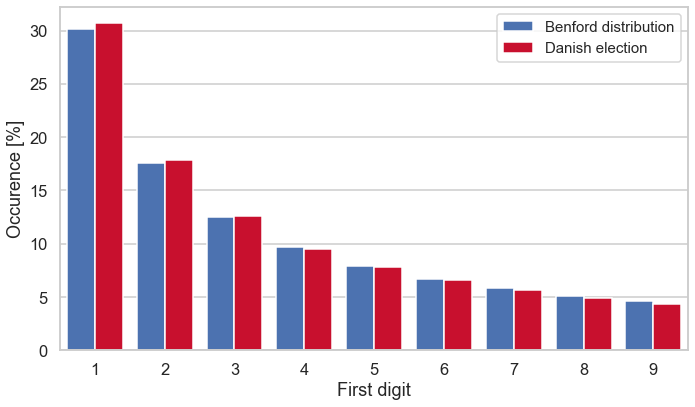

In [18]:
colors = ["b", "#C8102E"]
fig, ax = plt.subplots(figsize=(10,6))
sns.set_theme(style="whitegrid", context="talk")
lol = pd.melt(ben, id_vars=['test'], value_vars=['Benford distribution', 'Danish election' ])
lol.rename(columns={'variable' : ' '}, inplace =True)
sns.barplot(data=lol, y = 'value', x='test', hue =' ', alpha = 1, palette=sns.color_palette(colors), saturation =15)
plt.xlabel('First digit')
plt.ylabel('Occurence [%]')

plt.legend(bbox_to_anchor=(0.98, 0.98), loc=0, borderaxespad=0. , fontsize =10)
plt.legend(fontsize = 15)
plt.tight_layout()
plt.savefig('Danish electon')